## Getting Started

The dataset encompasses details of individuals insured with a Healthcare Organization. It comprises attributes like age, gender, BMI, and more.<br>
__Problem Statement :__
Develop a solution to predict the insurance premium for health insurance holders.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('\insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


## Data exploration
To gain insights into the data, we'll employ diverse methods for thorough exploration.

In [3]:
data.shape

(1338, 7)

In [4]:
data.isnull().sum().sum()

0

In [5]:
data.duplicated().sum()

1

- The dataset comprises 1338 rows and 7 columns.
- No missing values are present in the dataset.
- There is only one duplicated value.

In [6]:
data.columns.values

array(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'],
      dtype=object)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [9]:
data.describe(include='object').T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


- The age range spans from 18 to 64 years, with the youngest and oldest individuals.
- BMI values vary between 16 and 53, notably diverging from the ideal range of 18 to 25.
- On average, insurance holders file claims of 13270.42 USD, with the maximum claim at 63770.43 USD.
- A quarter of insurance holders (25%) claim sums exceeding 16639.91 USD.

## Data Visualization & Analysis

In [10]:
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 150
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

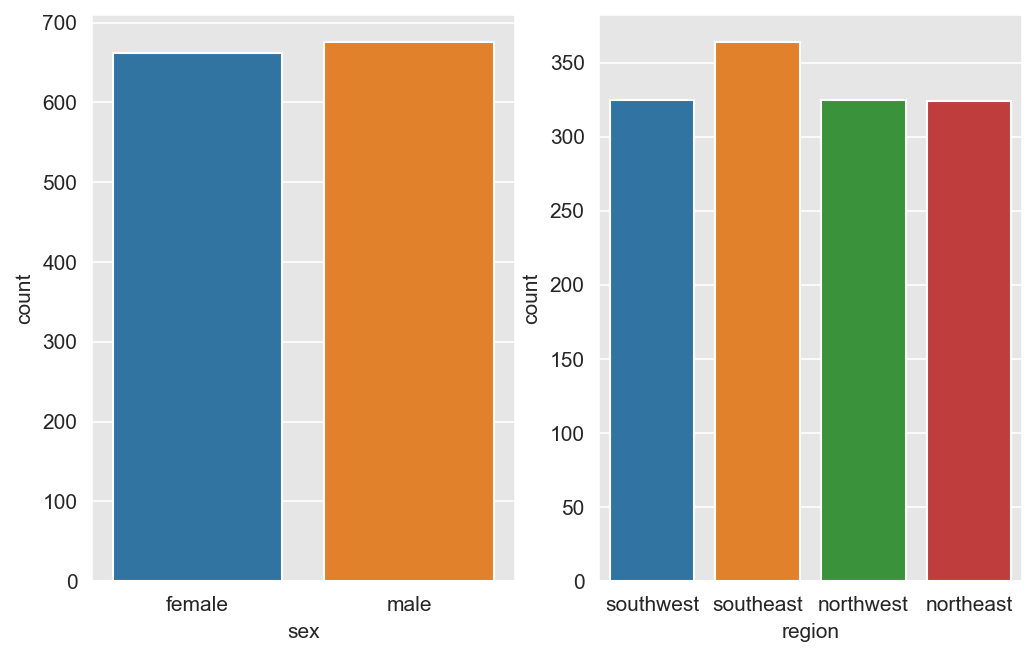

In [11]:
fig, ax = plt.subplots(1, 2)
sns.countplot(x = 'sex', data = data, ax = ax[0])
sns.countplot(x = 'region', data = data, ax = ax[1]);

- The male and female counts exhibit nearly equal proportions.
- The majority of individuals originate from the southeast region.

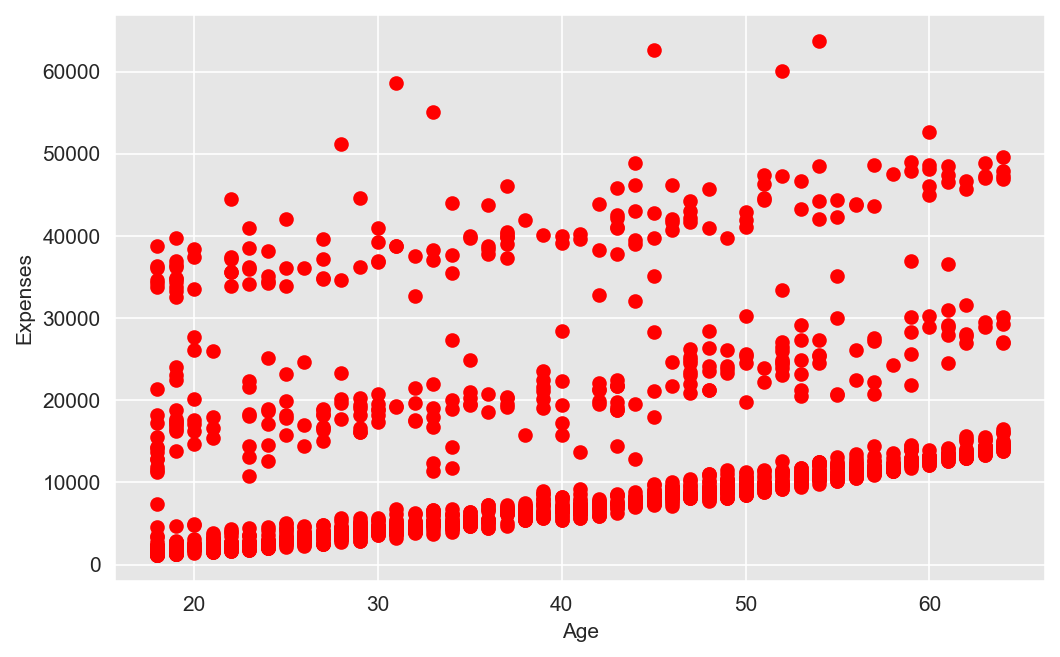

In [12]:
plt.xlabel('Age')
plt.ylabel('Expenses')
plt.plot(data['age'], data['expenses'], 'ro');

- As age increases, the expenses incurred by the insurance holder increases drastically.

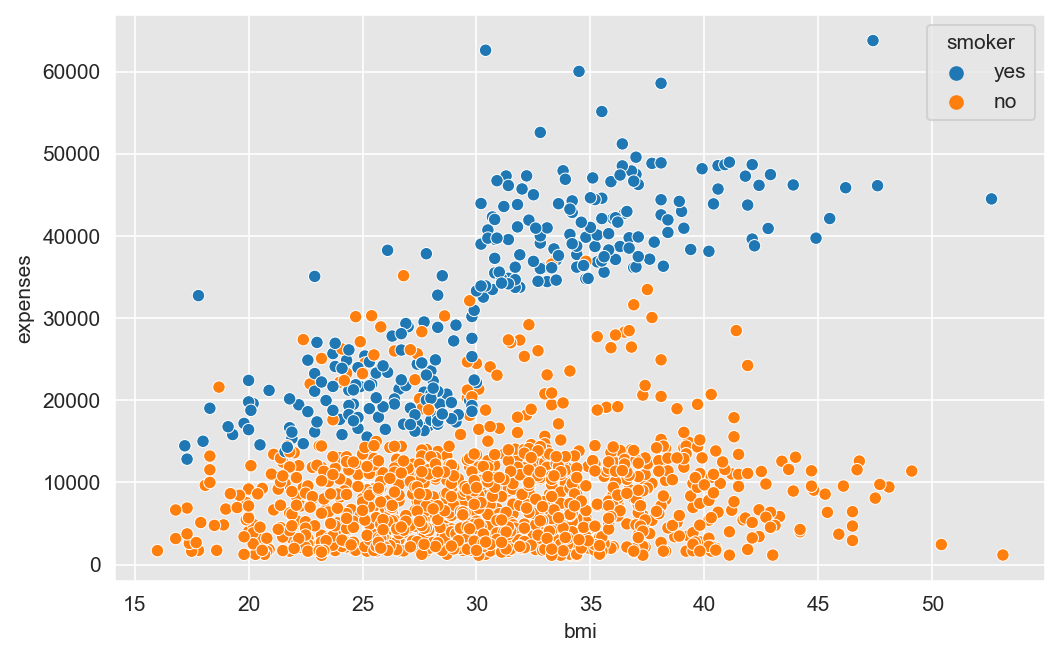

In [13]:
sns.scatterplot(x = 'bmi', y = 'expenses', hue='smoker', data=data);

- Non-smokers face lower likelihood of higher insurance premium charges.
- Smokers with bmi more than 30 have a high chances of claiming more than 30,000 USD.

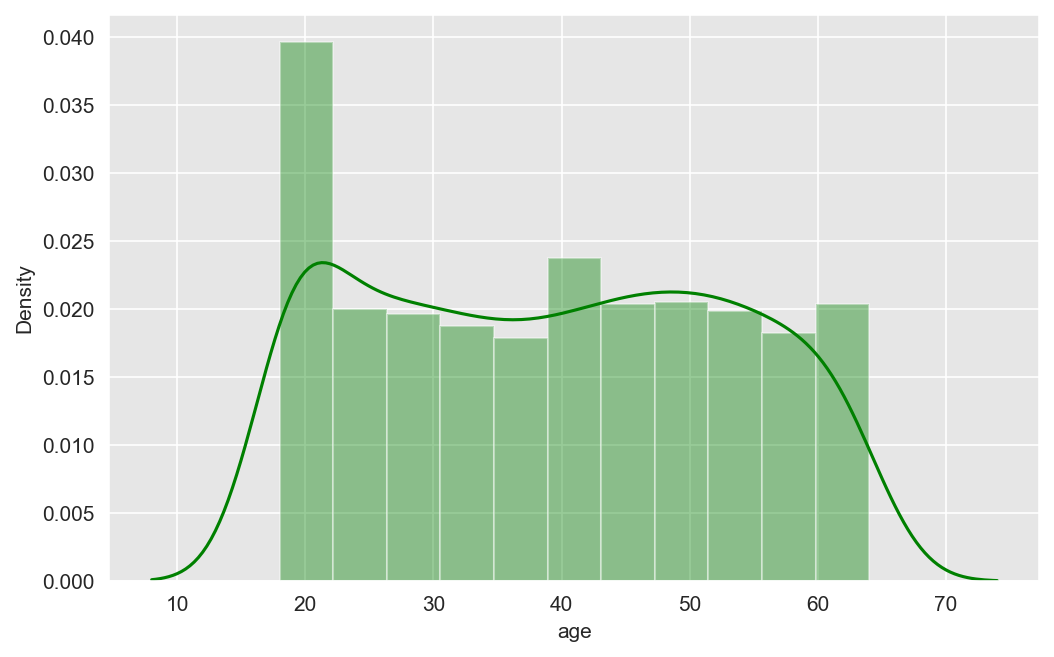

In [14]:
sns.distplot(data['age'], color = 'g');

- The age groups 20-24 and 40-44 constitute the highest number of healthcare insurance holders.

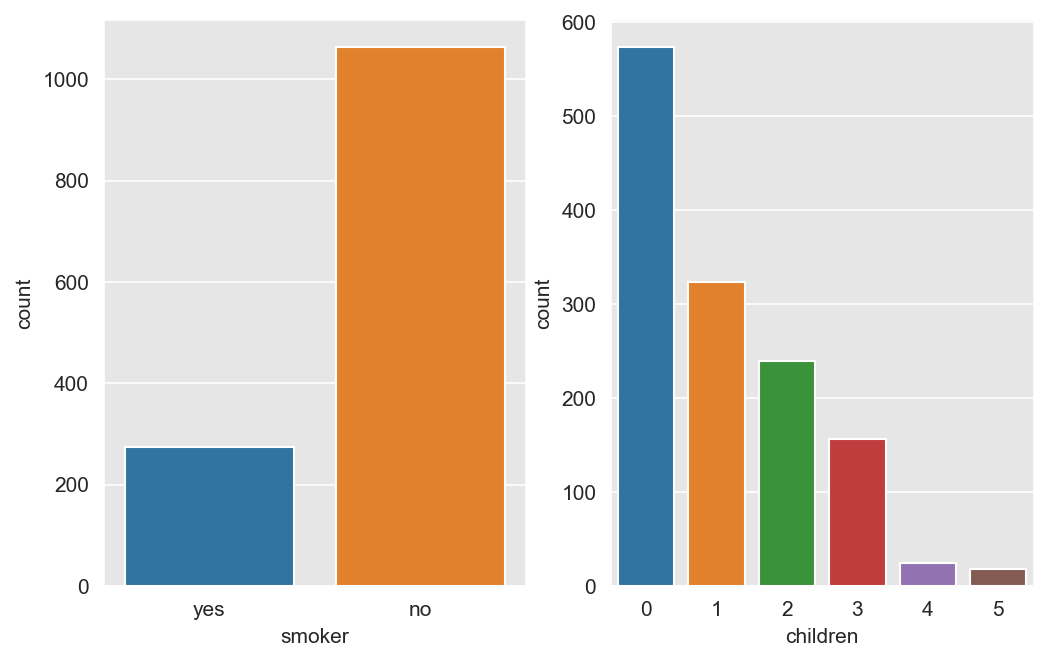

In [15]:
fig, ax = plt.subplots(1,2)
sns.countplot(x = 'smoker', data = data, ax = ax[0])
sns.countplot(x = 'children', data = data, ax = ax[1]);

- The density of smokers is 1/4 compared to non-smokers.
- A significant portion of individuals have no children, while those with 4-5 children are less common.

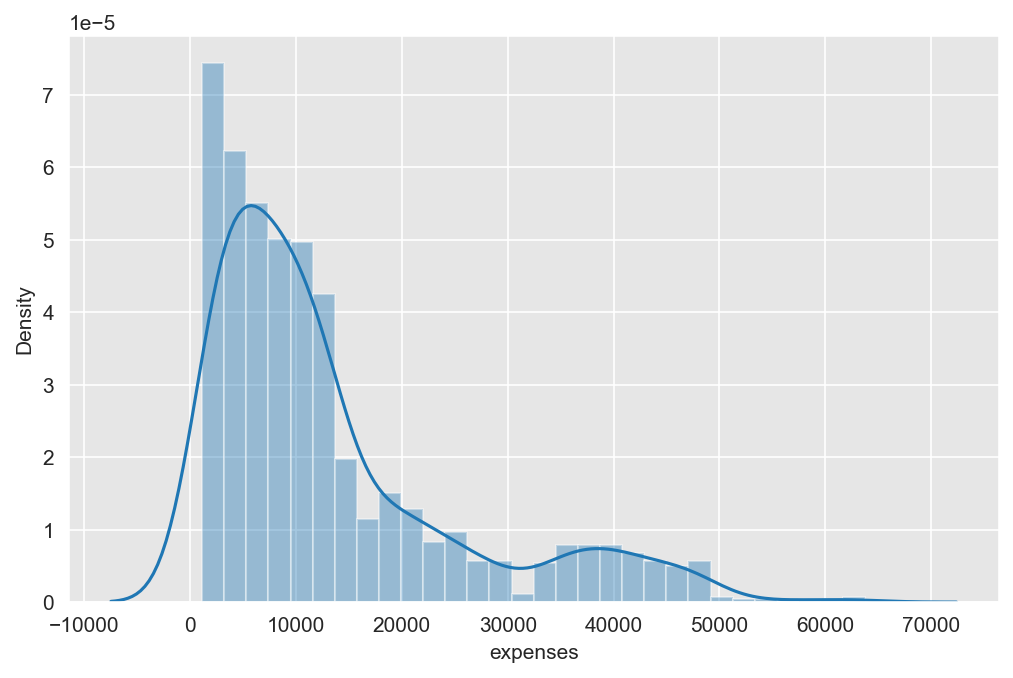

In [16]:
sns.distplot(data['expenses']);

Most of the insurance claims range from 10,000 to 20,000 USD.

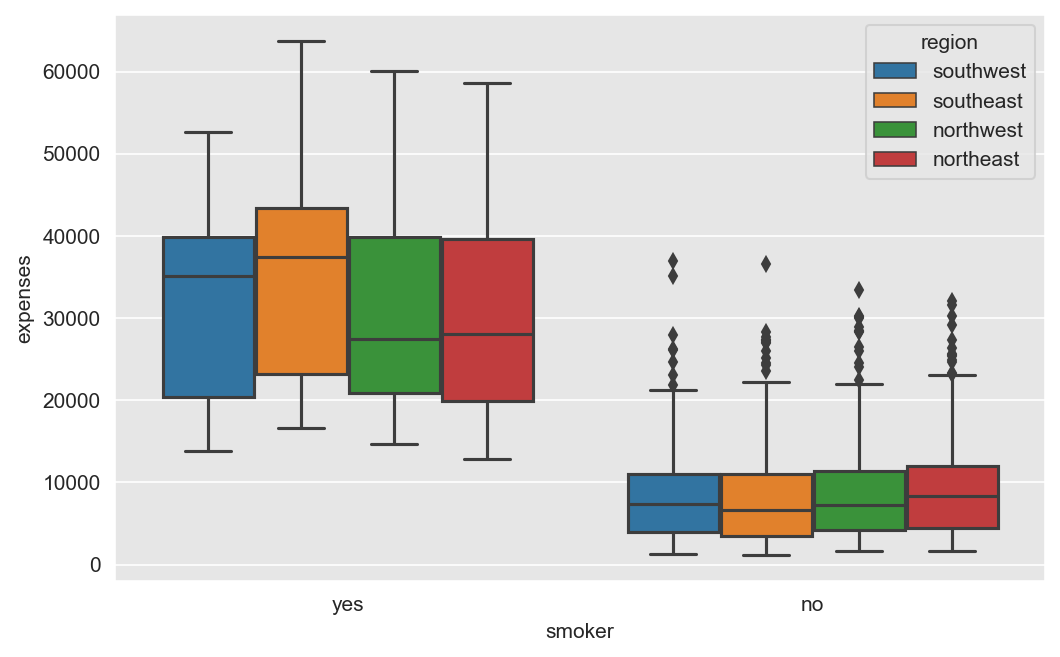

In [17]:
sns.boxplot(x = 'smoker', y = 'expenses', hue = 'region', data = data);

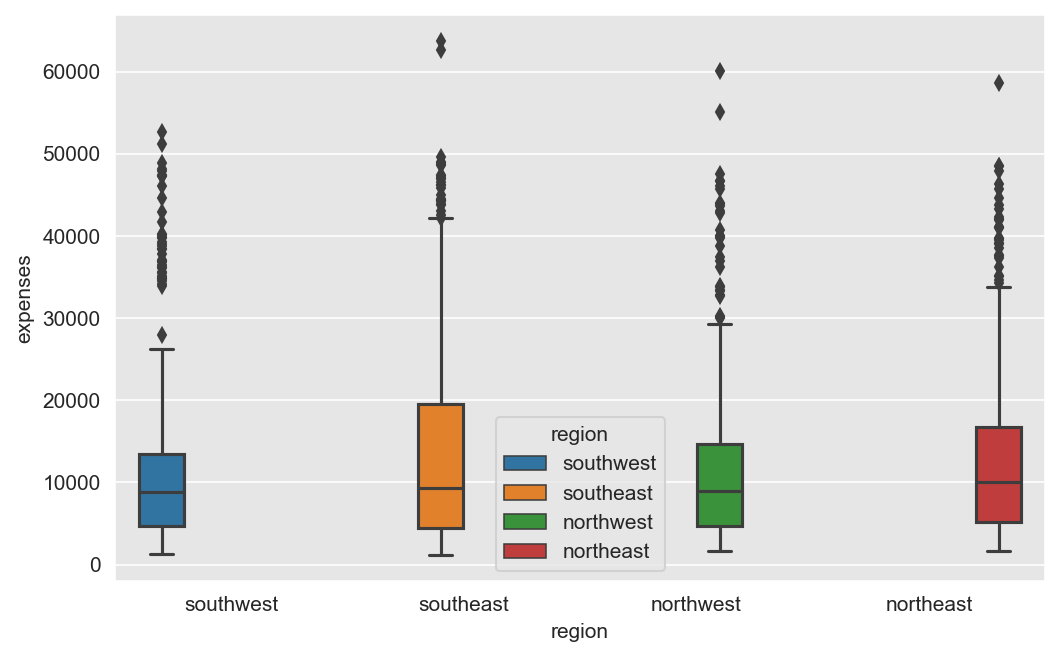

In [18]:
sns.boxplot(x = 'region', y = 'expenses', hue = 'region', data = data);

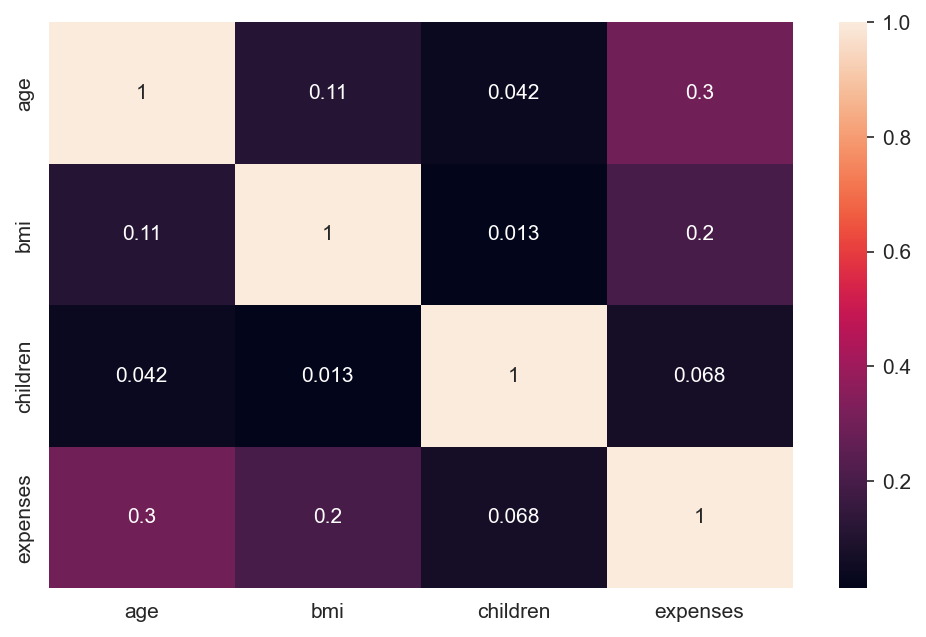

In [19]:
sns.heatmap(data.corr(), annot = True);

The "children" and "expenses" features exhibit a noticeable correlation, as do the "children" and "age" features, which is to be expected.

## Conclusion

Summarizing the key insights obtained:

- A quarter of insurance holders (25%) claim sums exceeding 16,639.91 USD.
- Majority of individuals are from the southeast region, and they tend to incur the highest charges.
- There's a significant rise in expenses as age increases.
- Non-smokers demonstrate lower vulnerability to higher charges.
- Smokers with a BMI exceeding 30 display a higher likelihood of claiming over 30,000 USD.